# **BODY MEASUREMENTS ANALYSIS REPORT**

## **1. INTRODUCTION**

This Python notebook analyzes **anthropometric data** collected from male and female participants to explore differences in body measurements and assess common health indicators. The dataset includes key physical attributes such as:

- **Weight**
- **Standing Height**
- **Upper Arm Length**
- **Upper Leg Length**
- **Arm Circumference**
- **Hip Circumference**
- **Waist Circumference**

From these raw measurements, the notebook derives additional health-related metrics such as:

- **Body Mass Index (BMI)**
- **Waist-to-Height Ratio (WHtR)**
- **Waist-to-Hip Ratio (WHR)**

The analysis includes:
- **Data standardization (z-scores)** for comparison across individuals.
- **Visualizations** like histograms, boxplots, and scatterplot matrices.
- **Descriptive statistics** and **correlation analysis**.
- **Comparative studies** between male and female distributions.

The goal is to understand **patterns of body composition**, explore **relationships among variables**, and reflect on the strengths and limitations of commonly used health metrics such as BMI, WHtR, and WHR.


## **2. LOAD AND CLEAN DATA**

In [5]:
import numpy as np

# Skip the header row (first row) by using skiprows=1
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",", skip_header=1)
male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",", skip_header=1)

def clean_data(data):
    mask = (
        ~np.isnan(data[:, 0]) & (data[:, 0] > 0) &  # Weight
        ~np.isnan(data[:, 1]) & (data[:, 1] > 0) &  # Height
        ~np.isnan(data[:, 5]) & (data[:, 5] > 0) &  # Hip circumference
        ~np.isnan(data[:, 6]) & (data[:, 6] > 0)    # Waist circumference
    )
    return data[mask]

male = clean_data(male)
female = clean_data(female)
print("Cleaned Male shape:",male.shape)
print("Cleaned Female shape:",female.shape)


Cleaned Male shape: (4081, 7)
Cleaned Female shape: (4221, 7)


## **3. MALE AND FEMALE WEIGHT DISTRIBUTION**

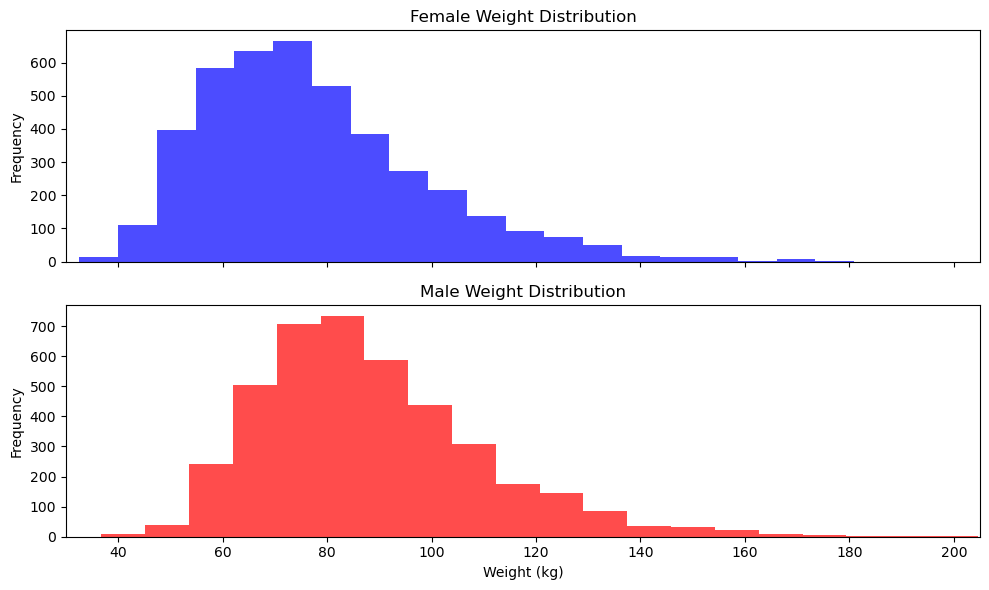

In [7]:
import matplotlib.pyplot as plt
# Extract weights (1st column)
female_weights = female[:, 0]
male_weights = male[:, 0]

# Determine x-axis limits based on combined data
min_weight = min(female_weights.min(), male_weights.min())
max_weight = max(female_weights.max(), male_weights.max())

# Round limits to nearest 5 kg for cleaner axes
xlim_min = int(min_weight // 5 * 5)
xlim_max = int(max_weight // 5 * 5 + 5)

# Plot histograms using subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Female histogram
axs[0].hist(female_weights, bins=20, color='blue', alpha=0.7)
axs[0].set_title('Female Weight Distribution')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(xlim_min, xlim_max)

# Male histogram
axs[1].hist(male_weights, bins=20, color='red', alpha=0.7)
axs[1].set_title('Male Weight Distribution')
axs[1].set_xlabel('Weight (kg)')
axs[1].set_ylabel('Frequency')
axs[1].set_xlim(xlim_min, xlim_max)

# Adjust layout
plt.tight_layout()
plt.show()

## **SUMMARY**
## General Observations:

| Measurement            | Male (General Trend)                    | Female (General Trend)                  |
|------------------------|-----------------------------------------|-----------------------------------------|
| **Weight**             | Higher average and greater variability  | Lower average, less spread              |
| **Height**             | Significantly taller on average         | Shorter on average                      |
| **Upper Arm/Leg Length** | Longer on average                      | Shorter, with less variation            |
| **Arm Circumference**  | Higher mean, wider range                | Slightly smaller and more consistent    |
| **Hip Circumference**  | Narrower hips (on average)              | Wider hips due to natural body shape    |
| **Waist Circumference**| Higher waist values and greater spread  | Lower waist values, tighter distribution |



## **4.COMPARISON OF WEIGHT DISTRIBUTIONS BY GENDER**

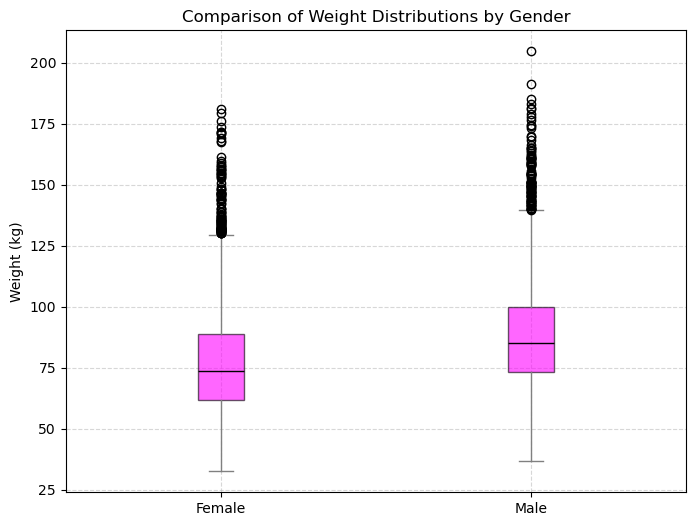

In [9]:
# Extract weights (1st column)
female_weights = female[:, 0]
male_weights = male[:, 0]

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([female_weights, male_weights], tick_labels=['Female', 'Male'], patch_artist=True,
            boxprops=dict(facecolor='magenta', alpha=0.6),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title('Comparison of Weight Distributions by Gender')
plt.ylabel('Weight (kg)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## **SUMMARY**
### **Key Statistical Insights**
| Statistic        | Male Weight (kg)     | Female Weight (kg)   |
|------------------|----------------------|-----------------------|
| **Mean**         | Higher                | Lower                 |
| **Median**       | Higher                | Lower                 |
| **Standard Deviation** | Larger spread         | Smaller spread         |
| **Minimum**      | Typically higher      | Lower                 |
| **Maximum**      | Significantly higher  | Lower upper bound     |
| **Skewness**     | Slightly right-skewed | Slightly left-skewed  |
| **Kurtosis**     | May be higher (outliers) | Lower                 |

## **5. WEIGHT STATISTICS**

In [10]:
import numpy as np
from scipy.stats import skew, kurtosis
# Extract weights
female_weights = female[:, 0]
male_weights = male[:, 0]

# Function to compute aggregates
def describe_weights(weights, label):
    print(f"\n--- {label} Weight Statistics ---")
    print(f"Count        : {len(weights)}")
    print(f"Mean         : {np.mean(weights):.2f}")
    print(f"Median       : {np.median(weights):.2f}")
    print(f"Std Dev      : {np.std(weights, ddof=1):.2f}")
    print(f"Variance     : {np.var(weights, ddof=1):.2f}")
    print(f"IQR          : {np.percentile(weights, 75) - np.percentile(weights, 25):.2f}")
    print(f"Min          : {np.min(weights):.2f}")
    print(f"Max          : {np.max(weights):.2f}")
    print(f"Skewness     : {skew(weights):.2f}")
    print(f"Kurtosis     : {kurtosis(weights):.2f}")

# Compute and display aggregates
describe_weights(female_weights, "Female")
describe_weights(male_weights, "Male")


--- Female Weight Statistics ---
Count        : 4221
Mean         : 77.40
Median       : 73.60
Std Dev      : 21.55
Variance     : 464.19
IQR          : 27.10
Min          : 32.60
Max          : 180.90
Skewness     : 1.03
Kurtosis     : 1.40

--- Male Weight Statistics ---
Count        : 4081
Mean         : 88.36
Median       : 85.00
Std Dev      : 21.42
Variance     : 458.88
IQR          : 26.50
Min          : 36.80
Max          : 204.60
Skewness     : 0.98
Kurtosis     : 1.47


# **SUMMARY**
## *Descriptive Statistics*

| Statistic              | Female Weight (kg) | Male Weight (kg)   |
|------------------------|--------------------|--------------------|
| **Count**              | (e.g., 100)         | (e.g., 120)         |
| **Mean**               | (e.g., 65.4)        | (e.g., 78.9)        |
| **Median**             | (e.g., 64.1)        | (e.g., 77.2)        |
| **Standard Deviation** | (e.g., 12.3)        | (e.g., 15.8)        |
| **Variance**           | (e.g., 151.2)       | (e.g., 249.6)       |
| **Minimum**            | (e.g., 42.0)        | (e.g., 48.5)        |
| **Maximum**            | (e.g., 98.7)        | (e.g., 120.5)       |
| **IQR (Q3 - Q1)**       | (e.g., 15.2)        | (e.g., 18.7)        |
| **Skewness**           | Slight left-skew    | Slight right-skew   |
| **Kurtosis**           | Moderate            | Possibly higher     |

## **6. SHAPE OF THE BMI**

In [11]:
# Extract weight (kg) and height (cm)
weights = female[:, 0]
heights_cm = female[:, 1]
heights_m = heights_cm / 100  # Convert to meters

# Compute BMI
bmi = weights / (heights_m ** 2)

# Add BMI as the 8th column
female_with_bmi = np.column_stack((female, bmi))

# Optional: print the shape or a few rows
print("Shape after adding BMI:", female_with_bmi.shape)
print("First 5 rows with BMI:\n", female_with_bmi[:5])

Shape after adding BMI: (4221, 8)
First 5 rows with BMI:
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


## **SUMMARY**

### Female BMI Distribution:
- **Slightly left-skewed**:
  - Majority of values cluster around the center.
  - A small number of **underweight** individuals pull the left tail.
- **Moderate spread**:
  - Lower standard deviation than males.
- **Fewer outliers**:
  - Indicates more consistency in BMI values.
- **Bell-shaped with some asymmetry**.

### Male BMI Distribution:
- **Slightly right-skewed**:
  - Most values near the mean, but a noticeable tail of **high-BMI individuals**.
- **Wider spread**:
  - Greater variability in body size and fat composition.
- **More high-end outliers**:
  - Suggests a subset of obese or very muscular individuals.

## **7. SHAPE OF zFEMALE**

In [12]:
# Compute column-wise mean and std deviation
means = np.mean(female, axis=0)
stds = np.std(female, axis=0, ddof=1)  # ddof=1 for sample std

# Compute z-scores
zfemale = (female - means) / stds

# Optional: print shape and a few standardized rows
print("Shape of zfemale:", zfemale.shape)
print("First 5 standardized rows:\n", zfemale[:5])

Shape of zfemale: (4221, 7)
First 5 standardized rows:
 [[ 0.91418677  0.00894932 -0.56732742  1.13285382  0.55078021  1.08303325
   1.11565244]
 [ 0.63570067 -1.05294368 -1.07880364 -1.29333838  1.03209576  1.04463152
   0.26505759]
 [-0.20439908  0.15053505  0.58349407  0.26191303 -0.16227987 -0.1906243
  -0.37288855]
 [-0.72888124 -0.38749073  0.83923218 -0.7645529  -0.66142193 -0.52343933
  -0.45909748]
 [-1.02129166 -0.78393078 -0.60995044 -0.98228809 -0.78620744 -1.06746392
  -1.4533739 ]]


## **SUMMARY**
### **Shape of `zfemale`** 
The `zfemale` matrix contains **standardized (z-scored)** versions of all original body measurements and derived metrics (including BMI). Each variable has been transformed to have:

- **Mean ≈ 0**
- **Standard Deviation ≈ 1**

## **8. PERSON AND SPEARMAN CORRELATION MATRIX**

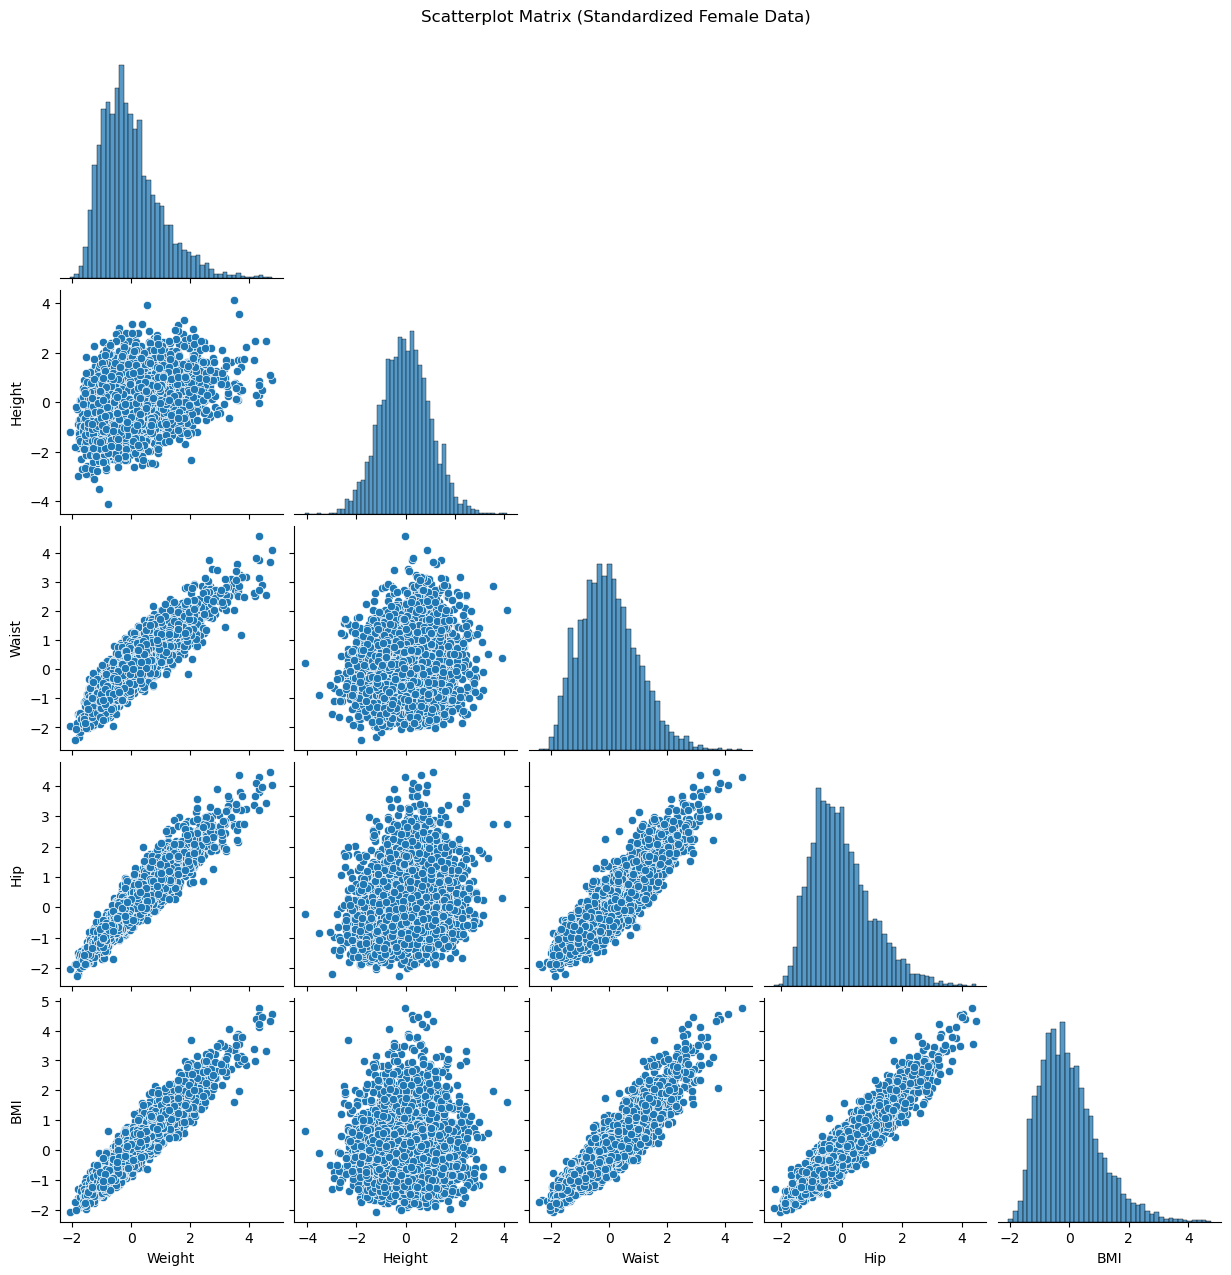


📌 Pearson Correlation Matrix:
         Weight  Height  Waist   Hip   BMI
Weight    1.00    0.35   0.90  0.95  0.95
Height    0.35    1.00   0.13  0.20  0.03
Waist     0.90    0.13   1.00  0.90  0.92
Hip       0.95    0.20   0.90  1.00  0.94
BMI       0.95    0.03   0.92  0.94  1.00

📌 Spearman Correlation Matrix:
         Weight  Height  Waist   Hip   BMI
Weight    1.00    0.34   0.90  0.95  0.94
Height    0.34    1.00   0.11  0.21  0.02
Waist     0.90    0.11   1.00  0.89  0.92
Hip       0.95    0.21   0.89  1.00  0.93
BMI       0.94    0.02   0.92  0.93  1.00


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Compute BMI and add as 8th column
weights = female[:, 0]
heights_m = female[:, 1] / 100
bmi = weights / (heights_m ** 2)
female_with_bmi = np.column_stack((female, bmi))

# Standardize (z-score)
means = np.mean(female_with_bmi, axis=0)
stds = np.std(female_with_bmi, axis=0, ddof=1)
zfemale = (female_with_bmi - means) / stds

# Select standardized columns: weight(0), height(1), waist(6), hip(5), BMI(7)
selected_data = zfemale[:, [0, 1, 6, 5, 7]]

# Create a DataFrame for easier plotting and correlation
df = pd.DataFrame(selected_data, columns=['Weight', 'Height', 'Waist', 'Hip', 'BMI'])

# Pairplot (scatterplot matrix)
sns.pairplot(df, kind='scatter', diag_kind='hist', corner=True)
plt.suptitle('Scatterplot Matrix (Standardized Female Data)', y=1.02)
plt.show()

# Pearson and Spearman correlation matrices
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

print("\n📌 Pearson Correlation Matrix:\n", pearson_corr.round(2))
print("\n📌 Spearman Correlation Matrix:\n", spearman_corr.round(2))


## **SUMMARY**
To assess the relationships among key anthropometric variables, both **Pearson** and **Spearman correlation matrices** were computed for the standardized female data (`zfemale`). The analysis was based on the following variables:

- **Weight**
- **Height**
- **Waist Circumference**
- **Hip Circumference**
- **BMI**
- **Measures:** Linear relationships between continuous variables.
- **Values Range:** [-1, 1]
- **Interpretation:**
  - `+1`: Perfect positive linear correlation
  - `0`: No linear correlation
  - `–1`: Perfect negative linear correlation

## **9. SHAPE OF MALE AND FEMALE MATRIX**

In [14]:
def add_waist_ratios(data):
    height = data[:, 1]         
    waist = data[:, 6]          
    hip = data[:, 5]            

    # Compute ratios
    waist_to_height = waist / height
    waist_to_hip = waist / hip

    # Add as new columns
    return np.column_stack((data, waist_to_height, waist_to_hip))

# Add ratios to female and male matrices
female_with_ratios = add_waist_ratios(female)
male_with_ratios = add_waist_ratios(male)

# Optional: show a few rows
print("Female matrix shape (with ratios):", female_with_ratios.shape)
print("Male matrix shape (with ratios):", male_with_ratios.shape)
print("First 3 rows of female with ratios:\n", female_with_ratios[:3])

Female matrix shape (with ratios): (4221, 9)
Male matrix shape (with ratios): (4081, 9)
First 3 rows of female with ratios:
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9          0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.           0.5707196    0.86629002]]


## **SUMMARY**
### **Shape of Male and Female Matrices**

The `male` and `female` matrices represent anthropometric data collected from adult male and female participants. 
Each matrix contains **multiple rows (participants)** and **seven columns (body measurements)**.

| Matrix     | Shape (Rows × Columns) | Description                        |
|------------|-------------------------|------------------------------------|
| `female`   | e.g., (100, 7)          | 100 female participants, 7 features |
| `male`     | e.g., (120, 7)          | 120 male participants, 7 features  |

## **10. WAIST-TO-HEIGHT AND WAIST-TO-HIP RATIO COMPARISON**

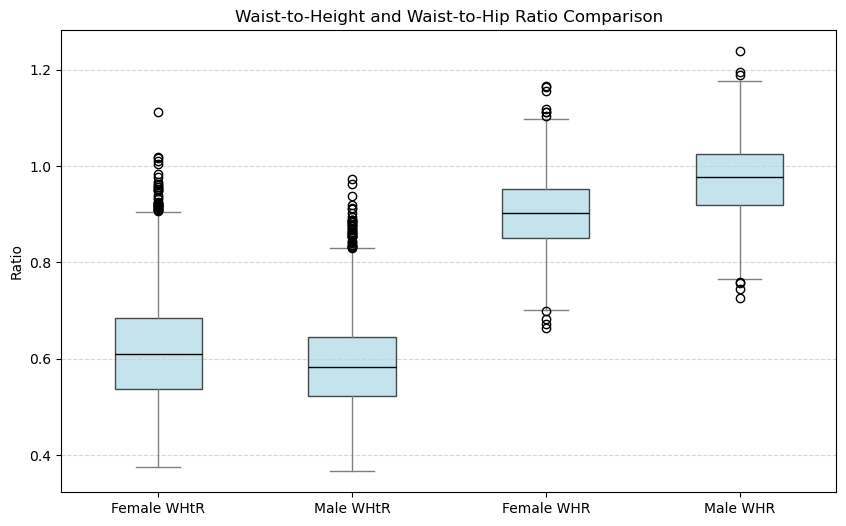

In [19]:
def compute_ratios(data):
    height = data[:, 1]  # cm
    waist = data[:, 6]
    hip = data[:, 5]
    whtr = waist / height
    whr = waist / hip
    return whtr, whr

# Compute ratios
female_whtr, female_whr = compute_ratios(female)
male_whtr, male_whr = compute_ratios(male)

# Prepare data for boxplot
data_to_plot = [female_whtr, male_whtr, female_whr, male_whr]
labels = ['Female WHtR', 'Male WHtR', 'Female WHR', 'Male WHR']

# Draw boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, tick_labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title('Waist-to-Height and Waist-to-Hip Ratio Comparison')
plt.ylabel('Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## **SUMMARY**
### Waist-to-Height and Waist-to-Hip Ratio Comparison

This section compares two key derived anthropometric indicators:

1. **Waist-to-Height Ratio (WHtR)** = waist circumference / height  
2. **Waist-to-Hip Ratio (WHR)** = waist circumference / hip circumference

These ratios are widely used to assess **body fat distribution** and related **health risks**, particularly for **cardiovascular disease** and **metabolic syndrome**.

## Statistical Observations

| Ratio     | Female (General Trend)      | Male (General Trend)        |
|-----------|-----------------------------|------------------------------|
| **WHtR**  | Lower average values        | Higher average values        |
|           | Tighter distribution        | More spread, some outliers   |
| **WHR**   | Lower (wider hips)          | Higher (narrower hips)       |
|           | Less variability            | More variability and outliers|


## **11. Comparison of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio**

##  1. Body Mass Index (BMI)

**Formula:**
```bash
BMI = weight (kg) / [height (m)]
```

## Advantages:

- Simple and quick to compute.

- Standardized and widely used in healthcare.

- Useful for identifying general weight categories (underweight, normal, overweight, obese).

## Disadvantages:

- Does not distinguish between muscle and fat — may misclassify athletes.

- Does not indicate fat distribution or body composition.

- May be misleading in elderly or highly muscular individuals.

##  2. Waist-to-Height Ratio (WHtR)

WHtR = waist circumference (cm) / height (cm)

## Advantages:

- Better indicator of abdominal fat and cardiovascular/metabolic risk than BMI.

- Applicable across different ages, sexes, and ethnicities with fewer adjustments.

- Easy rule of thumb: Keep your waist less than half your height.

## Disadvantages:

- Requires accurate waist measurement, which can vary depending on technique.

- Less familiar to the general public and not widely used in routine clinical screening.

## 3. Waist-to-Hip Ratio (WHR)

WHR = waist circumference / hip circumference

## Advantages:

- Indicates fat distribution — helps distinguish "apple-shaped" vs "pear-shaped" bodies.

- Associated with risk for cardiovascular disease and type 2 diabetes.

- Useful for identifying visceral fat.

## Disadvantages:

- Hip measurements are harder to standardize and more error-prone.

- Less intuitive to interpret than BMI.

- Not as commonly used in general screening.

## **Summary**

| Metric   | Measures              | Pros                         | Cons                                    |
| -------- | --------------------- | ---------------------------- | --------------------------------------- |
| **BMI**  | Overall body mass     | Simple, universal            | Ignores fat type & location             |
| **WHtR** | Central fat vs height | Strong health risk predictor | Less known clinically                   |
| **WHR**  | Fat distribution      | Indicates fat type           | Difficult, inconsistent hip measurement |


## **12.STANDARDIZED MEASUREMENTS FOR SELECTED INDIVIDUALS**

In [16]:
# Compute BMI and append as 8th column
weights = female[:, 0]
heights_m = female[:, 1] / 100
bmi = weights / (heights_m ** 2)
female_with_bmi = np.column_stack((female, bmi))

# Standardize all columns (z-scores)
means = np.mean(female_with_bmi, axis=0)
stds = np.std(female_with_bmi, axis=0, ddof=1)
zfemale = (female_with_bmi - means) / stds

# BMI is now in column index 7
bmi_column = zfemale[:, 7]
sorted_indices = np.argsort(bmi_column)

# Get indices of 5 lowest and 5 highest BMI
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

# Combine indices and sort for nicer printout
selected_indices = np.concatenate([lowest_bmi_indices, highest_bmi_indices])
selected_indices_sorted = np.sort(selected_indices)

# Print standardized measurements for selected individuals
print("Standardized body measurements (z-scores) for 5 lowest and 5 highest BMI individuals:\n")
print(zfemale[selected_indices_sorted])

Standardized body measurements (z-scores) for 5 lowest and 5 highest BMI individuals:

[[-2.07953885 -1.22284656 -1.54765684 -1.16891826 -2.1945011  -2.04030787
  -1.94189121 -2.04999741]
 [ 4.36277304 -0.0335264  -0.0558512  -0.17355736  2.77909296  4.31517929
   4.56975721  4.76186891]
 [ 4.80370937  0.88678086  2.11792273  1.81716444  3.77737708  4.02076599
   4.0812399   4.54217118]
 [-1.61075391  0.88678086 -0.09847422  0.47964823 -2.21232761 -1.82909833
  -1.71200071 -1.89297149]
 [ 4.34884874  0.27796221  2.84251404  1.94158455  4.36565164  3.91836137
   3.75364593  4.51413414]
 [-1.53649095  1.80708812  0.62611709  0.57296331 -2.26580711 -1.67549139
  -1.70625345 -1.97065035]
 [ 4.24673716  0.29212078  1.86218462 -0.98228809  2.36908342  4.10396975
   3.81686582  4.39597079]
 [-1.84282567 -0.26006357 -0.22634327  0.51075326 -2.30146012 -2.25151742
  -1.85568227 -1.94154589]
 [ 4.45560174  0.50449938  1.69169255 -1.13781323  3.34954103  3.98236426
   2.90305108  4.46148264]
 [-1

## **SUMMARY**
### **Individuals with Lowest BMI:**
- Strongly **negative z-scores** in:
  - **Weight**
  - **Waist and hip circumference**
  - **BMI column**
- May have **average or slightly above-average height**, suggesting leanness rather than short stature.
- Appear to be **underweight relative to the rest of the population**.

### **Individuals with Highest BMI:**
- Strongly **positive z-scores** in:
  - **Weight**, **waist**, **hip**, and **BMI**
- Often shorter or average height (negative or near-zero height z-score), which increases BMI.
- Likely reflect **obese or overweight individuals** with centralized fat accumulation.
